# MINI PROJECT 1: Data Ingestion and Wrangling

Velkommen til mini-projektet, hvor der arbejdes med data ingestion, data wrangling og visualisering fra **CSV**, **JSON** og **TXT** filer.

Laver en celle her i starten til at importere de nødvendige biblioteker til hele programmet.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Indlæsning af data

Vi henter og indlæser data fra tre forskellige filtyper.

## Henting og indlæsning af CSV

In [6]:
# Henter CSV-data fra URL og sætter ind i en DataFrame
csv_url = "https://raw.githubusercontent.com/datasets/population/master/data/population.csv"
df_csv = pd.read_csv(csv_url)

# Viser de første 5 rækker af de oprindelige data
print(df_csv.head())

  Country Name Country Code  Year    Value
0        Aruba          ABW  1960  54922.0
1        Aruba          ABW  1961  55578.0
2        Aruba          ABW  1962  56320.0
3        Aruba          ABW  1963  57002.0
4        Aruba          ABW  1964  57619.0


## Henting og indlæsning af JSON


In [8]:
# Henter JSON-data fra JSONPlaceholder
url = "https://jsonplaceholder.typicode.com/comments"
df_json = pd.read_json(url)

# Viser de første 5 rækker af de oprindelige data 
print(df_json.head())

   postId  id                                       name  \
0       1   1               id labore ex et quam laborum   
1       1   2  quo vero reiciendis velit similique earum   
2       1   3              odio adipisci rerum aut animi   
3       1   4                             alias odio sit   
4       1   5      vero eaque aliquid doloribus et culpa   

                    email                                               body  
0      Eliseo@gardner.biz  laudantium enim quasi est quidem magnam volupt...  
1  Jayne_Kuhic@sydney.com  est natus enim nihil est dolore omnis voluptat...  
2     Nikita@garfield.biz  quia molestiae reprehenderit quasi aspernatur\...  
3           Lew@alysha.tv  non et atque\noccaecati deserunt quas accusant...  
4       Hayden@althea.biz  harum non quasi et ratione\ntempore iure ex vo...  


## Henting og indlæsning af TXT


In [10]:
# URL til ord-fil
txt_url = "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt"

# Læser filen direkte med Pandas
txt_data = pd.read_table(txt_url, header=None, names=['word'])

# Viser de første 10 ord
print(txt_data.head(10))  # Skift fra head() til head(10)

       word
0         2
1      1080
2        &c
3  10-point
4      10th
5  11-point
6  12-point
7  16-point
8  18-point
9       1st


# Data rensning

Fjerner fejl, manglende værdier og irrelevante data for at sikre, at datasættet er nemt læseligt og korrekt til analyse.

## TXT resning 

In [13]:
# Fjerner NaN-værdier og tomme ord
txt_data = txt_data.dropna()  
txt_data = txt_data[txt_data['word'].str.strip() != ''] 

# Fjerner eventuelle ord med specialtegn
txt_data['word'] = txt_data['word'].str.replace(r'[^a-zA-Z]', '', regex=True)

# Fjerner duplikater
txt_data = txt_data.drop_duplicates()

# Fjerner eventuelle tomme ord, der kan være i starten eller i slutningen af listen
txt_data = txt_data[txt_data['word'].str.strip() != '']

# Sætter ordene i alfabetisk rækkefølge og nulstiller index
txt_data = txt_data.sort_values(by='word').reset_index(drop=True)

# Tilføjer ekstra kolonner for bedre læsbarhed
txt_data['word_length'] = txt_data['word'].apply(len)  # Længden af ordet
txt_data['word_position'] = txt_data.index + 1  # Rækkefølge af ordet

# Omorganiserer kolonnerne, så det ser pænere ud
txt_data = txt_data[['word_position', 'word', 'word_length']]

# Viser de første 10 ord i et pænt format
print(txt_data.head(10).to_string(index=False))  

 word_position   word  word_length
             1      A            1
             2     AA            2
             3    AAA            3
             4   AAAA            4
             5 AAAAAA            6
             6   AAAL            4
             7   AAAS            4
             8    AAE            3
             9   AAEE            4
            10    AAF            3


## JSON rensning

In [15]:
# Fjerner linjeskift i body kolonnen
df_json['body'] = df_json['body'].str.replace('\n', ' ', regex=False)

# Dropper eventuelle NaN-værdier (hvis nødvendigt)
df_json_cleaned = df_json.dropna()

# Sørger for, at 'id' er int
df_json_cleaned['id'] = df_json_cleaned['id'].astype(int)

# Filtrerer kun data med postId fra 1 til 5
df_filtered = df_json_cleaned[df_json_cleaned['postId'].isin([1, 2, 3, 4, 5])]

# Filtrerer kun de første 5 rækker af de rensede data
df_first_5_json = df_filtered.head(5)

# Viser de første 5 rækker af de rensede data med mellemrum mellem kolonnerne
for i in range(5):
    print(f"postId: {df_first_5_json.loc[i, 'postId']}    "
          f"id: {df_first_5_json.loc[i, 'id']}    "
          f"name: {df_first_5_json.loc[i, 'name']}    "
          f"email: {df_first_5_json.loc[i, 'email']}    "
          f"body: {df_first_5_json.loc[i, 'body']}")
    print()  # Denne linje tilføjer et mellemrum (ny linje) mellem hver række

# Bruges til visualisering af antal kommentarer per postId
post_comment_counts = df_filtered['postId'].value_counts()

postId: 1    id: 1    name: id labore ex et quam laborum    email: Eliseo@gardner.biz    body: laudantium enim quasi est quidem magnam voluptate ipsam eos tempora quo necessitatibus dolor quam autem quasi reiciendis et nam sapiente accusantium

postId: 1    id: 2    name: quo vero reiciendis velit similique earum    email: Jayne_Kuhic@sydney.com    body: est natus enim nihil est dolore omnis voluptatem numquam et omnis occaecati quod ullam at voluptatem error expedita pariatur nihil sint nostrum voluptatem reiciendis et

postId: 1    id: 3    name: odio adipisci rerum aut animi    email: Nikita@garfield.biz    body: quia molestiae reprehenderit quasi aspernatur aut expedita occaecati aliquam eveniet laudantium omnis quibusdam delectus saepe quia accusamus maiores nam est cum et ducimus et vero voluptates excepturi deleniti ratione

postId: 1    id: 4    name: alias odio sit    email: Lew@alysha.tv    body: non et atque occaecati deserunt quas accusantium unde odit nobis qui voluptatem 

## CSV rensning

In [17]:
# Omformaterer 'Value' til numerisk type, hvis nødvendigt (med 'coerce' for at konvertere ikke-numeriske værdier til NaN)
df_csv['Value'] = pd.to_numeric(df_csv['Value'], errors='coerce')

# Dropper eventuelle NaN-værdier
df_csv_cleaned = df_csv.dropna()

# Beholder de nødvendige kolonner (Country Name, Year, Value)
df_csv_cleaned = df_csv_cleaned[['Country Name', 'Year', 'Value']]

# Laver navnet om fra 'Country Name' til 'Country' da det lyder bedre
df_csv_cleaned.rename(columns={'Country Name': 'Country'}, inplace=True)

# Viser de første 5 rækker af de rensede data
print(df_csv_cleaned.head())

# Filtrerer kun de første 5 rækker af datasættet
df_first_5_csv = df_csv_cleaned.head(5)

  Country  Year    Value
0   Aruba  1960  54922.0
1   Aruba  1961  55578.0
2   Aruba  1962  56320.0
3   Aruba  1963  57002.0
4   Aruba  1964  57619.0


# Visualisering

Vi laver simple visualiseringer af de indlæste data.

## 4.1 Visualisering af CSV Data

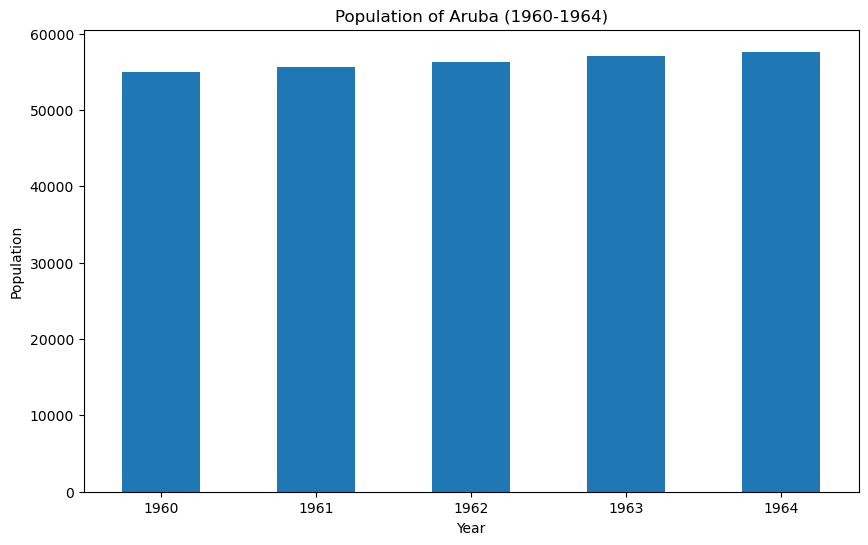

In [20]:
# Visualisering af befolkningstal for Aruba i perioden 1960-1964
df_first_5_csv.plot(kind='bar', x='Year', y='Value', figsize=(10,6), title="Population of Aruba (1960-1964)", legend=False)
plt.xticks(rotation=0)  
plt.ylabel('Population')
plt.show()

## 4.2 Visualisering af JSON Data

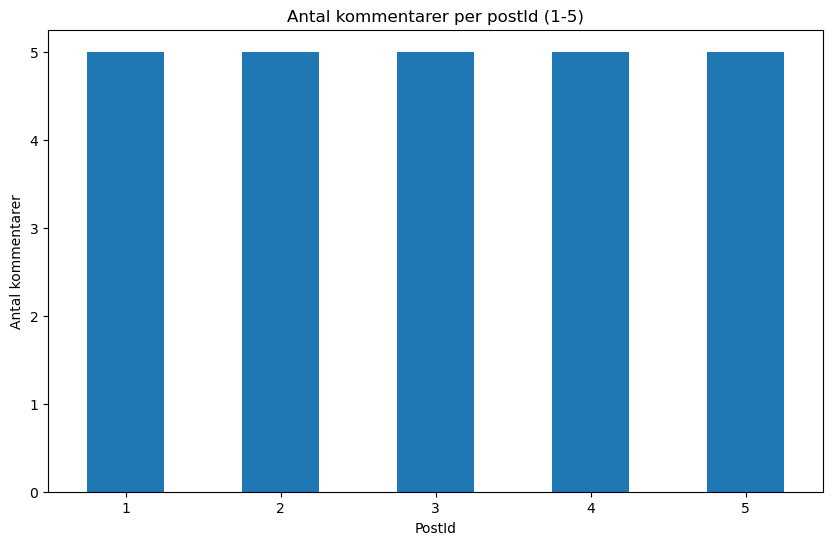

In [22]:
# Visualisering af antal kommentarer per postId
post_comment_counts.plot(kind='bar', figsize=(10, 6), title="Antal kommentarer per postId (1-5)")
plt.xlabel('PostId')
plt.ylabel('Antal kommentarer')
plt.xticks(rotation=0)  
plt.show()

## 4.3 Visualisering af TXT Data

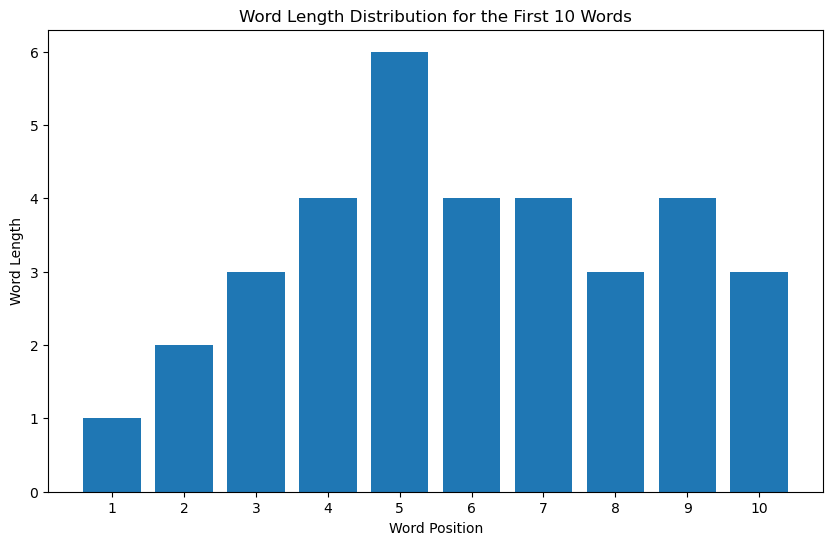

In [24]:
# Visualisering af ordlængdefordeling for de første 10 ord.
plt.figure(figsize=(10, 6))
plt.bar(txt_data.head(10)['word_position'], txt_data.head(10)['word_length'])
plt.title("Word Length Distribution for the First 10 Words")
plt.xlabel("Word Position")
plt.ylabel("Word Length")
plt.xticks(txt_data.head(10)['word_position']) 
plt.show()

# Anonymisering 

I dette projekt er anonymisering ikke nødvendigt, da der ikke findes følsomme personoplysninger i de brugte datasæt.

# Konklusion

I dette mini-projekt har vi lavet:

- Indlæst data fra tre forskellige filtyper (CSV, JSON, TXT).
- Renset og transformeret dataene til pandas DataFrames.
- Lavet simple visualiseringer for at analysere dataene.